In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing   import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

sns.set_theme(style="whitegrid")

In [3]:
df = pd.read_csv('turnover.csv',encoding='latin1')
df.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


In [4]:
df.isnull().sum()

stag            0
event           0
gender          0
age             0
industry        0
profession      0
traffic         0
coach           0
head_gender     0
greywage        0
way             0
extraversion    0
independ        0
selfcontrol     0
anxiety         0
novator         0
dtype: int64

In [5]:
df.duplicated().sum()

13

In [6]:
df =df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

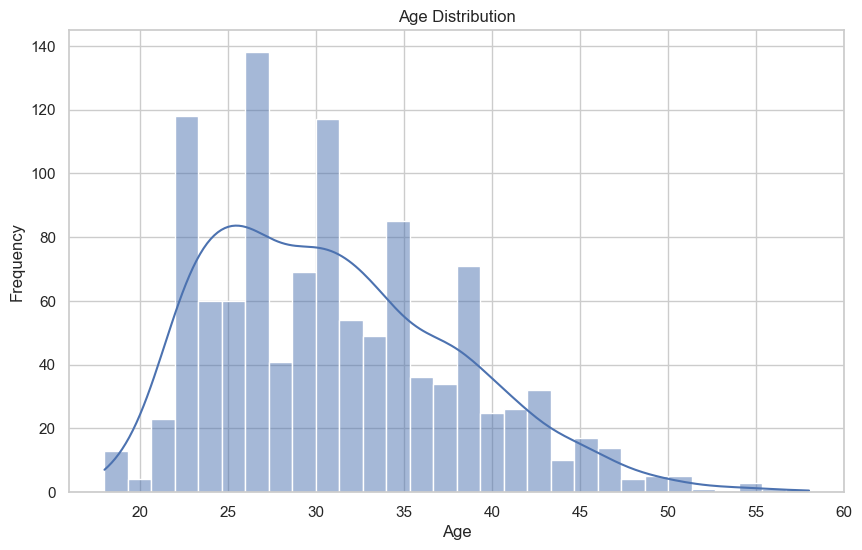

In [8]:
# Plotting distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

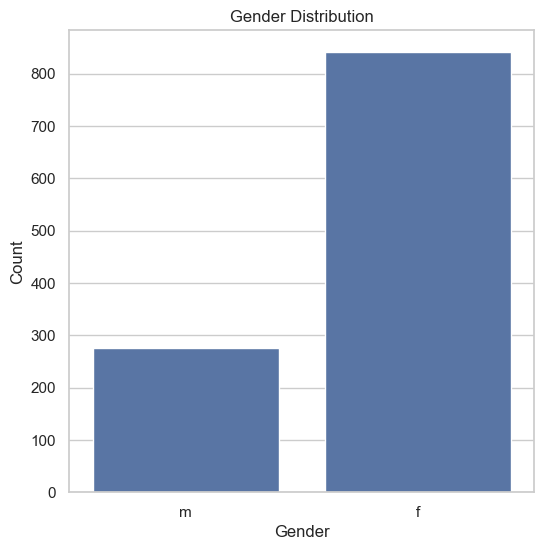

In [9]:
# Plotting gender distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

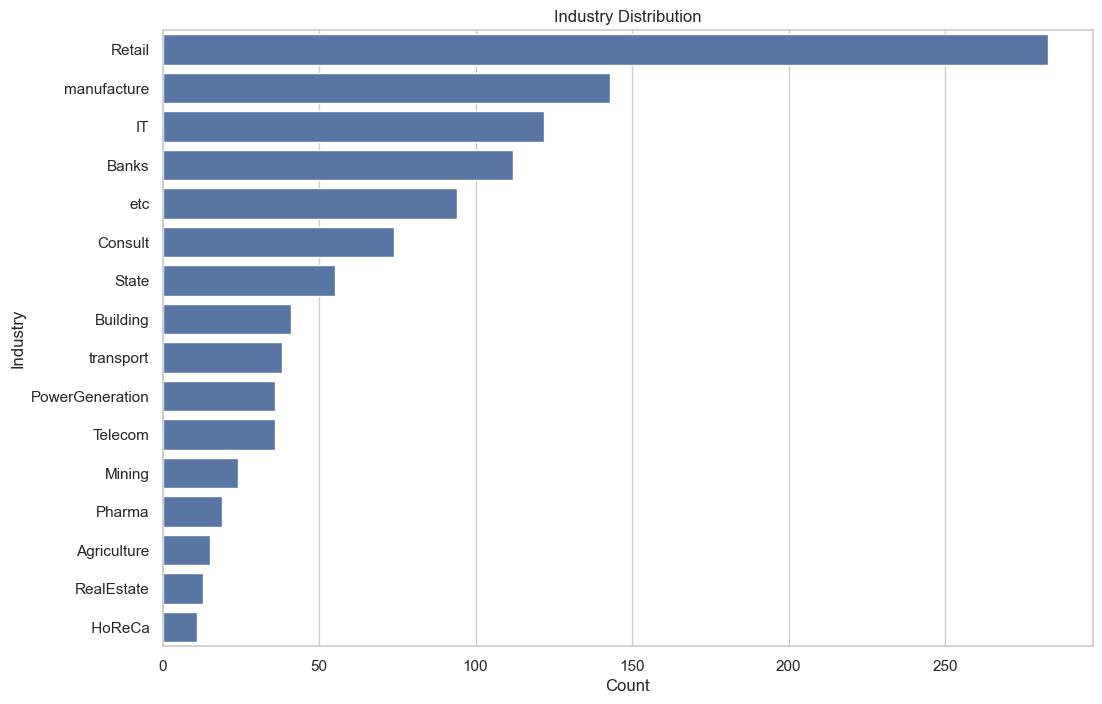

In [10]:
# Plotting industry distribution
plt.figure(figsize=(12, 8))
sns.countplot(y='industry', data=df, order=df['industry'].value_counts().index)
plt.title('Industry Distribution')
plt.xlabel('Count')
plt.ylabel('Industry')
plt.show()

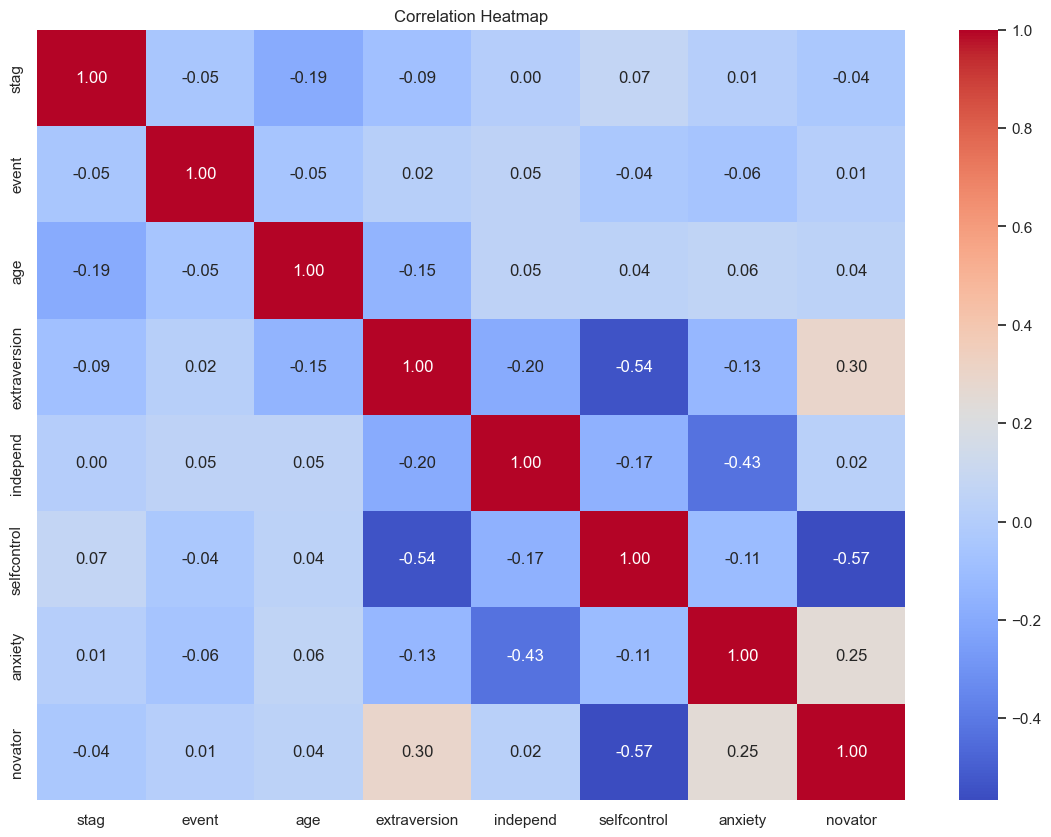

In [11]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[float, int])

# Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
encoder = LabelEncoder()
# List of columns to encode
columns_to_encode = ['gender', 'industry', 'profession', 'traffic', 'coach', 'head_gender', 'greywage', 'way']

# Apply the encoder to each column
for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[column])

In [13]:
df_new= df.copy()

In [14]:
df_new= pd.get_dummies(df_new, columns=['industry','profession','traffic','coach','head_gender','greywage','way', 'gender'], dtype=int)

In [15]:
df_new = df_new.drop(columns=['stag',])

In [16]:
X = df_new.drop('event', axis=1)
y = df_new['event']

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True,stratify=y,random_state=42)
print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)

Train shape: (892, 57)
Test shape: (224, 57)


In [19]:
def evaluate_model(y_pred, y_test):
    print(f'Accuracy: {np.round(metrics.accuracy_score(y_test, y_pred)*100, 2)}%')
    print(f'F1: {np.round(metrics.f1_score(y_test, y_pred)*100, 2)}%')
    print(f'Recall: {np.round(metrics.recall_score(y_test, y_pred)*100, 2)}%')
    print(f'Precision: {np.round(metrics.precision_score(y_test, y_pred)*100, 2)}%')
    print('Confusion matrix:\n') 
    sns.heatmap(metrics.confusion_matrix(y_pred, y_test), annot=True, fmt='g')

Accuracy: 64.73%
F1: 63.26%
Recall: 60.71%
Precision: 66.02%
Confusion matrix:



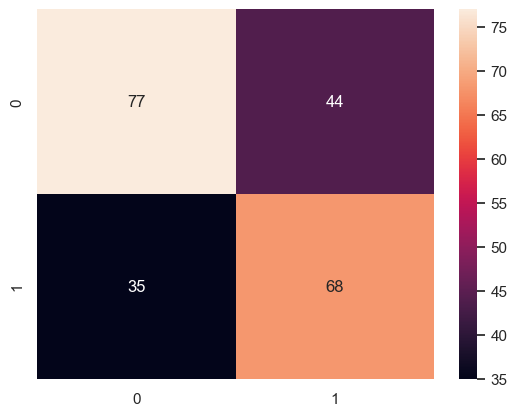

In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate_model(y_pred, y_test)

Accuracy: 60.71%
F1: 48.84%
Recall: 37.5%
Precision: 70.0%
Confusion matrix:



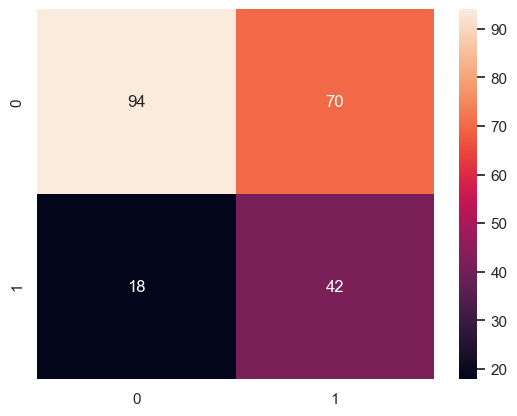

In [21]:
model = SVC(kernel='poly')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate_model(y_pred, y_test)

Accuracy: 64.29%
F1: 62.26%
Recall: 58.93%
Precision: 66.0%
Confusion matrix:



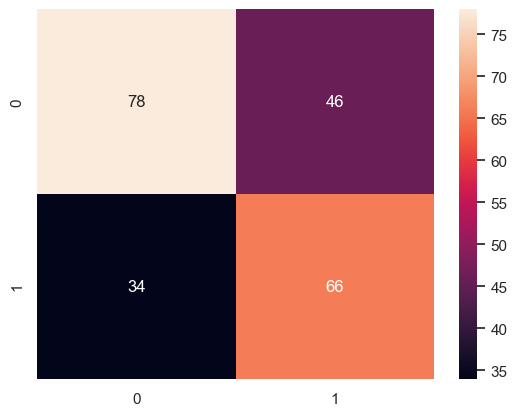

In [24]:
model = RandomForestClassifier(n_estimators=100,criterion='entropy',min_samples_split=2,min_samples_leaf=1,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate_model(y_pred, y_test)